<a href="https://colab.research.google.com/github/shiuli-19/22BCE0342-BCSE206L-Project/blob/main/notebooks/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Prepare data: Select relevant columns and handle categorical variables
# Assuming ethnicity is binary (0/1, e.g., 0=cauc, 1=other)
X = df[['age', 'education', 'ethnicity', 'lowincome16']]
y = df['kids']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output coefficients and metrics
print("Coefficients:")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients:
             Coefficient
age             0.028543
education      -0.134021
ethnicity       0.378149
lowincome16     0.161754

Mean Squared Error: 2.8908235773804556
R-squared: 0.1330136499901139


Summary Statistics for Age at First Birth:
count    3312.000000
mean       22.630737
std         4.859220
min         9.000000
25%        19.000000
50%        22.000000
75%        25.000000
max        42.000000
Name: agefirstbirth, dtype: float64


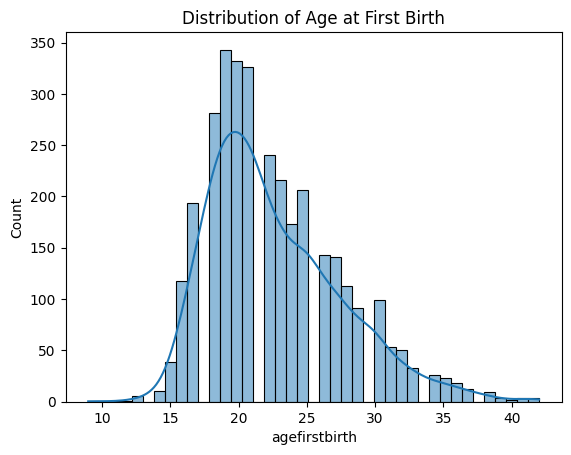

Coefficients:
             Coefficient
education       0.627047
lowincome16    -0.329446

Mean Squared Error: 20.43616308388883
R-squared: 0.15841687042037367

Average Age at First Birth by Education Level:
education
0     16.500000
1     13.000000
2     23.000000
3     19.250000
4     19.583333
5     19.611111
6     21.500000
7     22.043478
8     20.726415
9     19.598039
10    19.388889
11    19.959064
12    21.976253
13    22.093484
14    22.932990
15    24.194969
16    25.367688
17    25.869048
18    27.363636
19    26.000000
20    27.230769
Name: agefirstbirth, dtype: float64

Average Age at First Birth by Low Income at 16:
lowincome16
0    22.686222
1    22.127660
Name: agefirstbirth, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Filter for individuals with at least one child (kids >= 1 and agefirstbirth > 0)
df_filtered = df[(df['kids'] >= 1) & (df['agefirstbirth'] > 0)]

# Distribution analysis
print("Summary Statistics for Age at First Birth:")
print(df_filtered['agefirstbirth'].describe())

# Visualize distribution
sns.histplot(df_filtered['agefirstbirth'], kde=True)
plt.title('Distribution of Age at First Birth')
plt.show()

# Regression: Predict agefirstbirth using education and lowincome16 (socioeconomic at 16)
X = df_filtered[['education', 'lowincome16']]
y = df_filtered['agefirstbirth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Group comparisons
print("\nAverage Age at First Birth by Education Level:")
print(df_filtered.groupby('education')['agefirstbirth'].mean())

print("\nAverage Age at First Birth by Low Income at 16:")
print(df_filtered.groupby('lowincome16')['agefirstbirth'].mean())

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Group by lowincome16 and compute averages
comparison = df.groupby('lowincome16')[['education', 'kids']].mean().reset_index()
comparison.columns = ['Low Income at 16', 'Avg Education', 'Avg Kids']

print(comparison)

   Low Income at 16  Avg Education  Avg Kids
0                 0      12.906294  1.988165
1                 1      11.630031  2.401961


In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Group by immigrant and compute means
comparison = df.groupby('immigrant')[['kids', 'education', 'siblings']].mean().reset_index()
comparison.columns = ['Immigrant', 'Avg Kids', 'Avg Education', 'Avg Siblings']

print(comparison)

   Immigrant  Avg Kids  Avg Education  Avg Siblings
0          0  2.084954      12.652179      3.996306
1          1  2.004008      12.495992      4.492986


Summary by Ethnicity:
                education                                                    \
                    count       mean       std  min   25%   50%   75%   max   
ethnicity_label                                                               
cauc               7335.0  12.770825  2.920960  0.0  12.0  12.0  15.0  20.0   
other              1785.0  12.077311  3.029501  0.0  11.0  12.0  14.0  20.0   

                   kids            ...           agefirstbirth            \
                  count      mean  ...  75%  max         count      mean   
ethnicity_label                    ...                                     
cauc             7335.0  2.015951  ...  3.0  8.0        7335.0  8.108793   
other            1785.0  2.323249  ...  3.0  8.0        1785.0  8.669468   

                                                      
                      std  min  25%  50%   75%   max  
ethnicity_label                                       
cauc             11.40995  0.0  0.0 

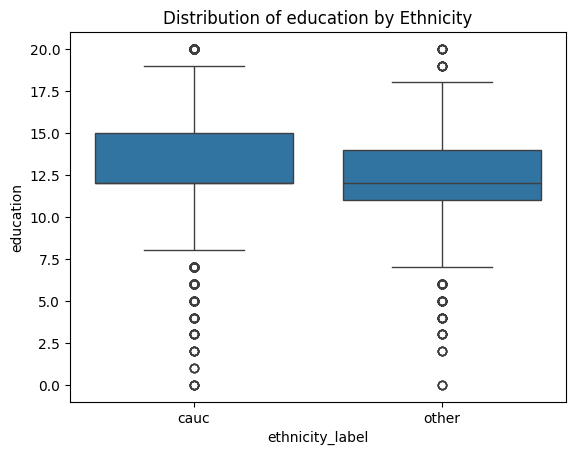

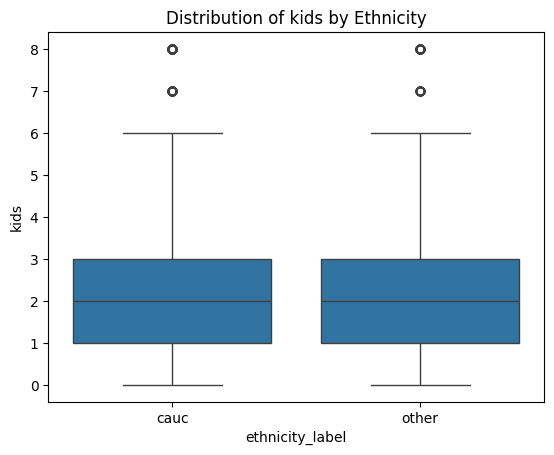

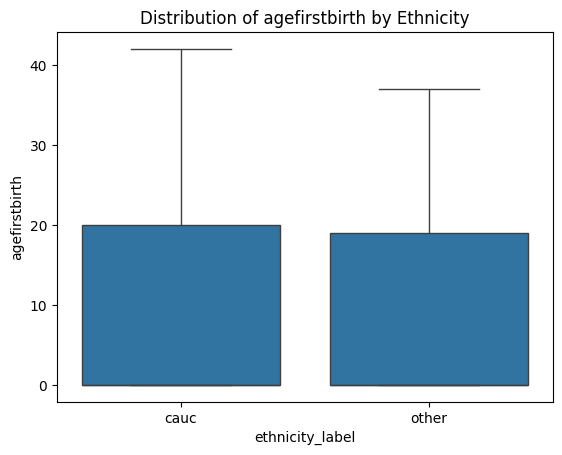

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Assuming ethnicity: 0 = 'cauc', 1 = 'other'
df['ethnicity_label'] = df['ethnicity'].map({0: 'cauc', 1: 'other'})

# Summary statistics by ethnicity
print("Summary by Ethnicity:")
print(df.groupby('ethnicity_label')[['education', 'kids', 'agefirstbirth']].describe())

# Visualize distributions
for var in ['education', 'kids', 'agefirstbirth']:
    sns.boxplot(x='ethnicity_label', y=var, data=df)
    plt.title(f'Distribution of {var} by Ethnicity')
    plt.show()

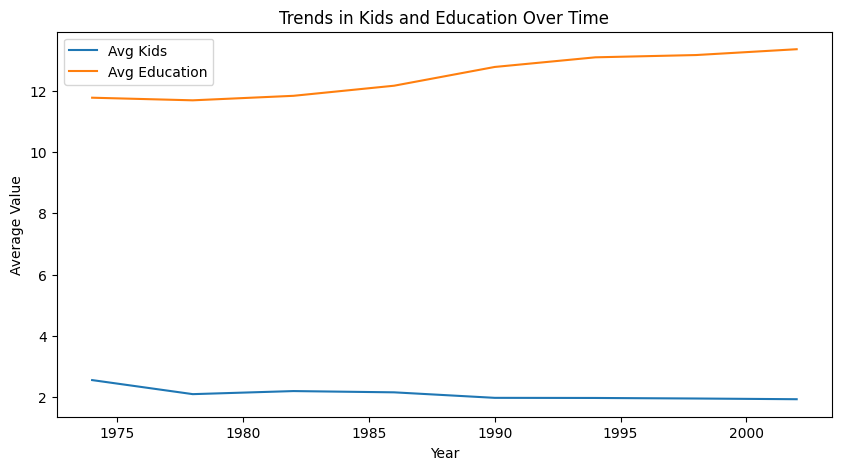

   year      kids  education
0  1974  2.563057  11.768153
1  1978  2.104903  11.683010
2  1982  2.204887  11.829887
3  1986  2.163895  12.159145
4  1990  1.984355  12.770535
5  1994  1.980450  13.084716
6  1998  1.962658  13.158861
7  2002  1.939354  13.348715


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('GSS7402_cleaned.csv')

# Group by year and compute averages
trends = df.groupby('year')[['kids', 'education']].mean().reset_index()

# Plot trends
plt.figure(figsize=(10, 5))
plt.plot(trends['year'], trends['kids'], label='Avg Kids')
plt.plot(trends['year'], trends['education'], label='Avg Education')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Trends in Kids and Education Over Time')
plt.legend()
plt.show()

# Print the trends data
print(trends)

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")

# Load the cleaned dataset
file_name = "GSS7402_cleaned.csv"
try:
    df = pd.read_csv(file_name)

    print(f"Successfully loaded {file_name}.\n")
    print("--- Starting Analysis ---")

    # --- 1. Fertility and Family Analysis ---
    print("\n--- 1. Fertility and Family Analysis ---")

    # 1.1. Regression: Factors influencing number of children
    print("\n[1.1] Regression Model for Number of Kids (kids ~ age + education + ethnicity + lowincome16)")

    # Define variables
    # We assume ethnicity, lowincome16, immigrant, etc., are already 0/1 encoded in the cleaned file
    X = df[['age', 'education', 'ethnicity', 'lowincome16']]
    y = df['kids']

    # Add a constant (intercept) to the model
    X = sm.add_constant(X)

    # Fit the OLS (Ordinary Least Squares) model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(model.summary())
    print("\n(Note: In the summary, 'const' is the intercept. 'coef' shows the association of each variable with 'kids'.)")


    # 1.2. Analysis of agefirstbirth
    print("\n[1.2] Analysis of Age at First Birth (for those with kids)")

    # Filter for individuals with at least one child (assuming agefirstbirth > 0 for them)
    df_with_kids = df[df['agefirstbirth'] > 0].copy()

    if df_with_kids.empty:
        print("No data found for individuals with children (agefirstbirth > 0). Skipping this section.")
    else:
        # Plot the distribution of agefirstbirth
        plt.figure(figsize=(10, 6))
        sns.histplot(df_with_kids['agefirstbirth'], kde=True, bins=30)
        plt.title('Distribution of Age at First Birth (for Parents)')
        plt.xlabel('Age at First Birth')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig('agefirstbirth_distribution.png')
        plt.clf()
        print("Saved plot: agefirstbirth_distribution.png")

        # Compare agefirstbirth by socioeconomic background (lowincome16)
        print("\nComparing Age at First Birth by Background (lowincome16):")
        agefirstbirth_by_lowincome = df_with_kids.groupby('lowincome16')['agefirstbirth'].agg(['mean', 'median', 'count'])
        print(agefirstbirth_by_lowincome)
        print("(Note: 0 = Not Low Income at 16, 1 = Low Income at 16)")

        # Boxplot for visual comparison
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='lowincome16', y='agefirstbirth', data=df_with_kids)
        plt.title('Age at First Birth vs. Low Income at 16')
        plt.xlabel('Low Income at 16 (0=No, 1=Yes)')
        plt.ylabel('Age at First Birth')
        plt.tight_layout()
        plt.savefig('agefirstbirth_vs_lowincome16.png')
        plt.clf()
        print("Saved plot: agefirstbirth_vs_lowincome16.png")


    # --- 2. Socioeconomic and Demographic Analysis ---
    print("\n--- 2. Socioeconomic and Demographic Analysis ---")

    # 2.1. Background (lowincome16) vs. Adult Outcomes (education, kids)
    print("\n[2.1] Adult Outcomes by Socioeconomic Background (lowincome16)")
    outcomes_by_lowincome = df.groupby('lowincome16')[['education', 'kids']].mean()
    print(outcomes_by_lowincome)
    print("(Note: 0 = Not Low Income at 16, 1 = Low Income at 16)")

    # 2.2. Impact of Immigration
    print("\n[2.2] Comparison by Immigration Status (immigrant)")
    outcomes_by_immigrant = df.groupby('immigrant')[['kids', 'education', 'siblings']].mean()
    print(outcomes_by_immigrant)
    print("(Note: 0 = Not Immigrant, 1 = Immigrant)")

    # 2.3. Ethnic Differences
    print("\n[2.3] Comparison by Ethnicity (ethnicity)")
    print("\nMean Education and Kids by Ethnicity:")
    outcomes_by_ethnicity = df.groupby('ethnicity')[['education', 'kids']].mean()
    print(outcomes_by_ethnicity)

    if not df_with_kids.empty:
        print("\nMean Age at First Birth (for Parents) by Ethnicity:")
        agefirstbirth_by_ethnicity = df_with_kids.groupby('ethnicity')['agefirstbirth'].mean()
        print(agefirstbirth_by_ethnicity)
    print("(Note: 0 = 'cauc' [likely], 1 = 'other' [likely])")

    # Plot distributions for ethnicity
    plt.figure(figsize=(12, 5))

    # Boxplot for education by ethnicity
    plt.subplot(1, 2, 1)
    sns.boxplot(x='ethnicity', y='education', data=df)
    plt.title('Education by Ethnicity')
    plt.xlabel('Ethnicity (0 vs 1)')

    # Boxplot for kids by ethnicity
    plt.subplot(1, 2, 2)
    sns.boxplot(x='ethnicity', y='kids', data=df)
    plt.title('Number of Kids by Ethnicity')
    plt.xlabel('Ethnicity (0 vs 1)')

    plt.tight_layout()
    plt.savefig('ethnicity_comparisons.png')
    plt.clf()
    print("Saved plot: ethnicity_comparisons.png")


    # --- 3. Survey and Time Series Analysis ---
    print("\n--- 3. Survey and Time Series Analysis ---")

    # 3.1. Explore changes over time (year)
    print("\n[3.1] Trends Over Time (by Year)")

    # Check number of unique years
    unique_years = df['year'].nunique()
    print(f"Found {unique_years} unique years in the dataset.")

    if unique_years > 1:
        # Group by year and calculate mean for 'kids' and 'education'
        time_trends = df.groupby('year')[['kids', 'education']].mean().reset_index()

        print("\nMean Kids and Education by Year:")
        print(time_trends)

        # Plot the trends
        plt.figure(figsize=(12, 6))

        # Plot for 'kids' over time
        plt.subplot(1, 2, 1)
        sns.lineplot(x='year', y='kids', data=time_trends, marker='o')
        plt.title('Average Number of Kids Over Time')
        plt.xlabel('Year')
        plt.ylabel('Average Kids')

        # Plot for 'education' over time
        plt.subplot(1, 2, 2)
        sns.lineplot(x='year', y='education', data=time_trends, marker='o')
        plt.title('Average Years of Education Over Time')
        plt.xlabel('Year')
        plt.ylabel('Average Education')

        plt.tight_layout()
        plt.savefig('time_trends.png')
        plt.clf()
        print("Saved plot: time_trends.png")

    else:
        print("Only one year found. Cannot plot time trends.")

    print("\n--- Analysis Complete ---")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An error occurred during analysis: {e}")

Successfully loaded GSS7402_cleaned.csv.

--- Starting Analysis ---

--- 1. Fertility and Family Analysis ---

[1.1] Regression Model for Number of Kids (kids ~ age + education + ethnicity + lowincome16)
                            OLS Regression Results                            
Dep. Variable:                   kids   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     438.4
Date:                Sun, 02 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:58:24   Log-Likelihood:                -17524.
No. Observations:                9120   AIC:                         3.506e+04
Df Residuals:                    9115   BIC:                         3.509e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
      

<Figure size 1000x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x600 with 0 Axes>